# Check relationship between temperature between windspeed and pollutant

In [94]:
import pandas as pd
dailyweather = pd.read_csv("HistoricalDailyWeatherRecords.csv")

In [95]:
dailyweather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2859 entries, 0 to 2858
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   date                      2859 non-null   object
 1   station                   2859 non-null   object
 2   daily_rainfall_total      2859 non-null   object
 3   highest_30_min_rainfall   2859 non-null   object
 4   highest_60_min_rainfall   2859 non-null   object
 5   highest_120_min_rainfall  2859 non-null   object
 6   mean_temperature          2859 non-null   object
 7   maximum_temperature       2859 non-null   object
 8   minimum_temperature       2859 non-null   object
 9   mean_wind_speed           2859 non-null   object
 10  max_wind_speed            2859 non-null   object
dtypes: object(11)
memory usage: 245.8+ KB


In [96]:
na_count = (dailyweather == 'na').any(axis=1).sum()
print(f"Number of rows with 'na': {na_count}")

Number of rows with 'na': 1790


In [97]:
rows_with_na = dailyweather[(dailyweather == 'na').any(axis=1)]
print(rows_with_na)

            date    station daily_rainfall_total highest_30_min_rainfall  \
0     2009-01-01  Admiralty                   na                      na   
1     2009-01-02  Admiralty                   na                      na   
2     2009-01-03  Admiralty                   na                      na   
3     2009-01-04  Admiralty                   na                      na   
4     2009-01-05  Admiralty                   na                      na   
...          ...        ...                  ...                     ...   
2854  2017-11-26  Admiralty                   na                      na   
2855  2017-11-27  Admiralty                   na                      na   
2856  2017-11-28  Admiralty                   na                      na   
2857  2017-11-29  Admiralty                   na                      na   
2858  2017-11-30  Admiralty                   na                      na   

     highest_60_min_rainfall highest_120_min_rainfall mean_temperature  \
0            

In [98]:
dailyweather_clean = dailyweather[~(dailyweather == 'na').any(axis=1)]

In [99]:
rows_with_na = dailyweather_clean[(dailyweather_clean == 'na').any(axis=1)]
print(rows_with_na)

Empty DataFrame
Columns: [date, station, daily_rainfall_total, highest_30_min_rainfall, highest_60_min_rainfall, highest_120_min_rainfall, mean_temperature, maximum_temperature, minimum_temperature, mean_wind_speed, max_wind_speed]
Index: []


In [100]:
dailyweather_clean["station"].value_counts()


station
Admiralty    1069
Name: count, dtype: int64

In [101]:
dailyweather_clean.describe

<bound method NDFrame.describe of             date    station daily_rainfall_total highest_30_min_rainfall  \
1673  2014-01-01  Admiralty                    0                       0   
1674  2014-01-02  Admiralty                    0                       0   
1675  2014-01-03  Admiralty                  4.6                     4.4   
1676  2014-01-04  Admiralty                  3.8                     3.8   
1677  2014-01-05  Admiralty                  3.6                     1.2   
...          ...        ...                  ...                     ...   
2843  2017-11-15  Admiralty                    0                       0   
2844  2017-11-16  Admiralty                 16.2                    14.4   
2845  2017-11-17  Admiralty                  0.2                     0.2   
2846  2017-11-18  Admiralty                   58                    47.8   
2847  2017-11-19  Admiralty                    0                       0   

     highest_60_min_rainfall highest_120_min_rainfall

In [102]:
dailyweather_clean.describe()

,date,station,daily_rainfall_total,highest_30_min_rainfall,highest_60_min_rainfall,highest_120_min_rainfall,mean_temperature,maximum_temperature,minimum_temperature,mean_wind_speed,max_wind_speed
count,1069,1069,1069,1069,1069,1069,1069,1069,1069,1069,1069
unique,1069,1,174,137,150,158,59,93,64,121,118
top,2014-01-01,Admiralty,0,0,0,0,28,32,25.2,6.1,33.8
freq,1,1069,527,527,527,527,49,36,46,66,26


In [103]:

dailyweather_clean_dropped_numeric = dailyweather_clean.drop('station', axis=1)
dailyweather_clean_dropped_numeric.head()


,date,daily_rainfall_total,highest_30_min_rainfall,highest_60_min_rainfall,highest_120_min_rainfall,mean_temperature,maximum_temperature,minimum_temperature,mean_wind_speed,max_wind_speed
1673,2014-01-01,0,0,0,0,26.3,28.8,24.3,10.8,34.2
1674,2014-01-02,0,0,0,0,26.9,30.7,24.6,11.5,38.2
1675,2014-01-03,4.6,4.4,4.4,4.6,26.5,29.5,24.9,9.7,34.2
1676,2014-01-04,3.8,3.8,3.8,3.8,26.4,31.2,24.7,8.1,32.8
1677,2014-01-05,3.6,1.2,1.6,2,24.6,25.3,23.6,8.4,27


In [104]:

dailyweather_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1069 entries, 1673 to 2847
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   date                      1069 non-null   object
 1   station                   1069 non-null   object
 2   daily_rainfall_total      1069 non-null   object
 3   highest_30_min_rainfall   1069 non-null   object
 4   highest_60_min_rainfall   1069 non-null   object
 5   highest_120_min_rainfall  1069 non-null   object
 6   mean_temperature          1069 non-null   object
 7   maximum_temperature       1069 non-null   object
 8   minimum_temperature       1069 non-null   object
 9   mean_wind_speed           1069 non-null   object
 10  max_wind_speed            1069 non-null   object
dtypes: object(11)
memory usage: 100.2+ KB


In [105]:
dailyweather_clean['date'] = pd.to_datetime(dailyweather_clean['date'])


/var/folders/w2/svppx15n0q1f6269nrsbflrr0000gn/T/ipykernel_1043/1919767125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dailyweather_clean['date'] = pd.to_datetime(dailyweather_clean['date'])


In [106]:
dailyweather_clean_numeric = dailyweather_clean.copy()
for col in dailyweather_clean_numeric.columns:
    if dailyweather_clean_numeric[col].dtype == 'object' and col != 'station':
        dailyweather_clean_numeric[col] = pd.to_numeric(dailyweather_clean_numeric[col], errors='coerce')

In [107]:
dailyweather_clean_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1069 entries, 1673 to 2847
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      1069 non-null   datetime64[ns]
 1   station                   1069 non-null   object        
 2   daily_rainfall_total      1069 non-null   float64       
 3   highest_30_min_rainfall   1069 non-null   float64       
 4   highest_60_min_rainfall   1069 non-null   float64       
 5   highest_120_min_rainfall  1069 non-null   float64       
 6   mean_temperature          1069 non-null   float64       
 7   maximum_temperature       1069 non-null   float64       
 8   minimum_temperature       1069 non-null   float64       
 9   mean_wind_speed           1069 non-null   float64       
 10  max_wind_speed            1069 non-null   float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 100.2+ KB


In [108]:
dailyweather_clean_numeric.head

<bound method NDFrame.head of            date    station  daily_rainfall_total  highest_30_min_rainfall  \
1673 2014-01-01  Admiralty                   0.0                      0.0   
1674 2014-01-02  Admiralty                   0.0                      0.0   
1675 2014-01-03  Admiralty                   4.6                      4.4   
1676 2014-01-04  Admiralty                   3.8                      3.8   
1677 2014-01-05  Admiralty                   3.6                      1.2   
...         ...        ...                   ...                      ...   
2843 2017-11-15  Admiralty                   0.0                      0.0   
2844 2017-11-16  Admiralty                  16.2                     14.4   
2845 2017-11-17  Admiralty                   0.2                      0.2   
2846 2017-11-18  Admiralty                  58.0                     47.8   
2847 2017-11-19  Admiralty                   0.0                      0.0   

      highest_60_min_rainfall  highest_120_mi

In [109]:
station_counts = dailyweather_clean['station'].value_counts()
print(station_counts)

station
Admiralty    1069
Name: count, dtype: int64


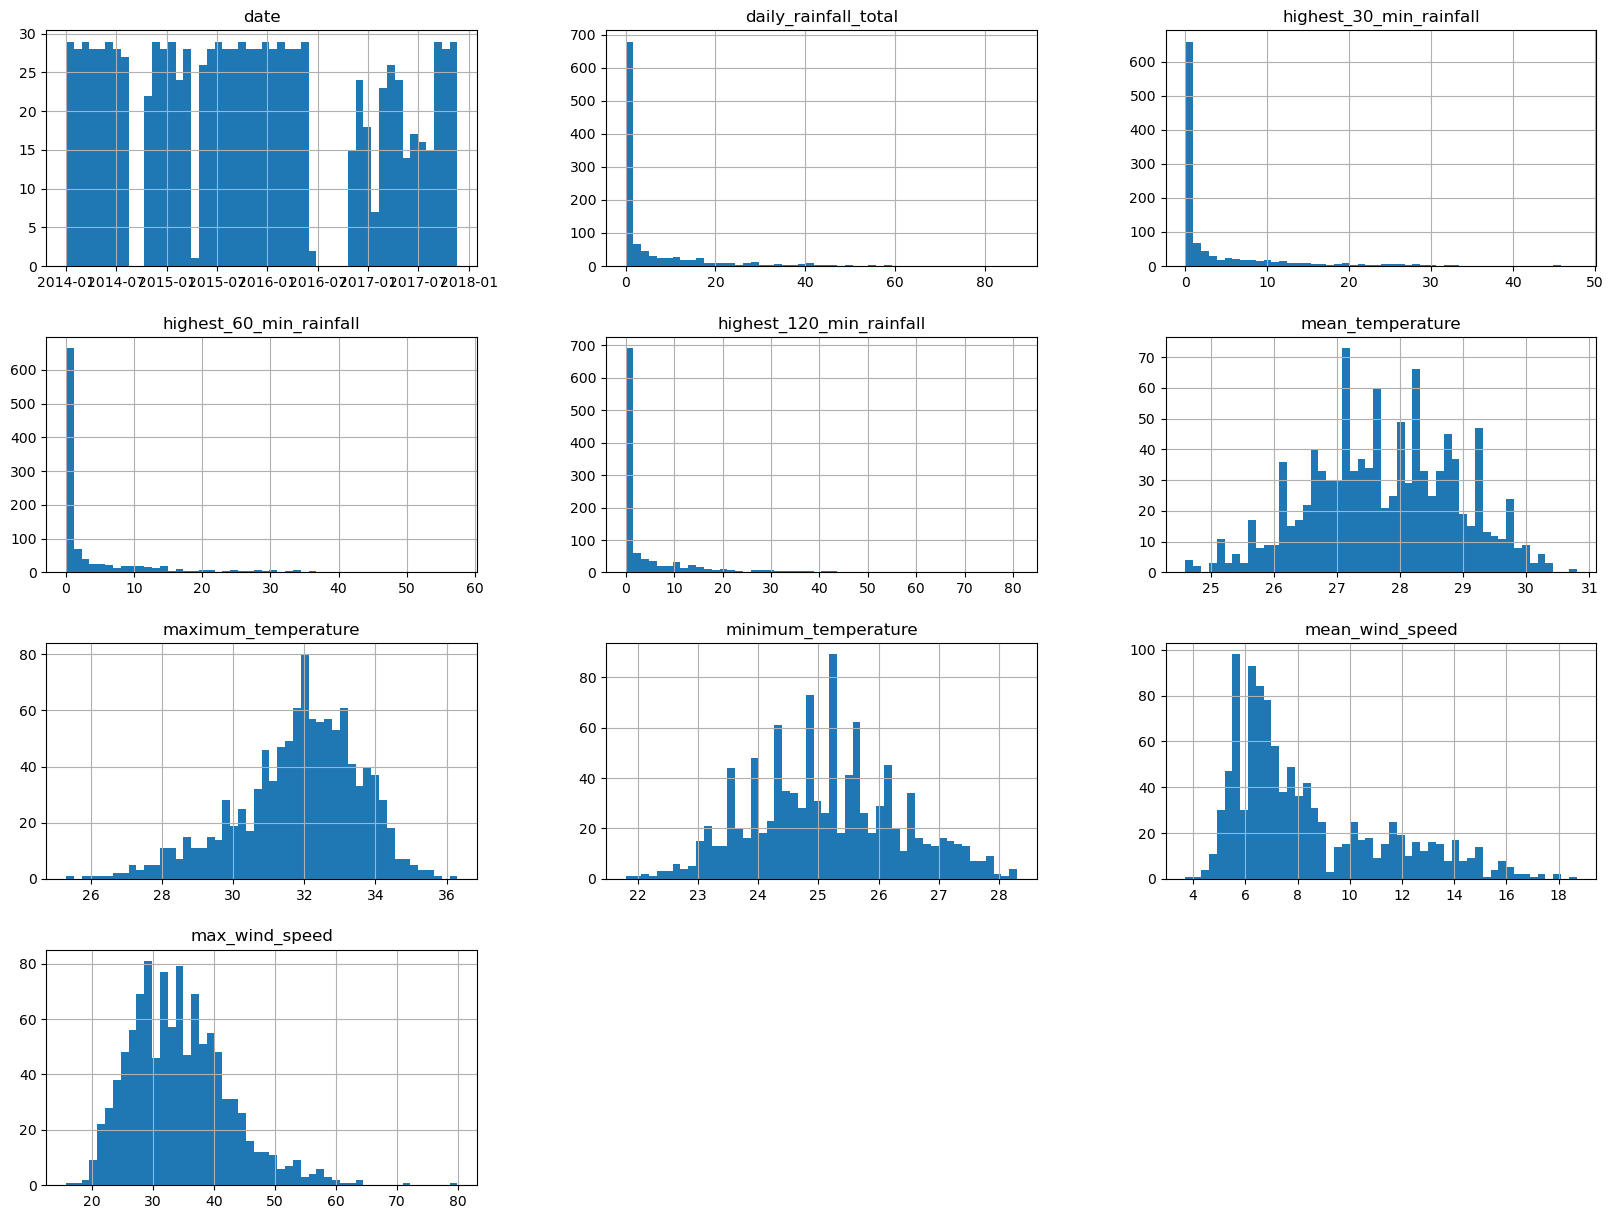

In [110]:
import matplotlib.pyplot as plt
dailyweather_clean_numeric.hist(bins=50, figsize=(20, 15))
plt.show()

In [111]:
psi2016 = pd.read_csv("HistoricalPollutantStandardsIndexPSI2016.csv")

In [112]:
psi2016.head

<bound method NDFrame.head of              date                  timestamp           update_timestamp  \
0      2016-02-07  2016-02-07T18:00:00+08:00                        NaN   
1      2016-02-07  2016-02-07T18:00:00+08:00                        NaN   
2      2016-02-07  2016-02-07T18:00:00+08:00                        NaN   
3      2016-02-07  2016-02-07T18:00:00+08:00                        NaN   
4      2016-02-07  2016-02-07T18:00:00+08:00                        NaN   
...           ...                        ...                        ...   
42883  2016-12-31  2016-12-31T23:00:00+08:00  2016-12-31T23:06:19+08:00   
42884  2016-12-31  2016-12-31T23:00:00+08:00  2016-12-31T23:06:19+08:00   
42885  2016-12-31  2016-12-31T23:00:00+08:00  2016-12-31T23:06:19+08:00   
42886  2016-12-31  2016-12-31T23:00:00+08:00  2016-12-31T23:06:19+08:00   
42887  2016-12-31  2016-12-31T23:00:00+08:00  2016-12-31T23:06:19+08:00   

         region region_id  location_longitude  location_latitude  \
0

In [113]:
psi2016north = psi2016[psi2016['region'] == 'north']
psi2016north.head()

,date,timestamp,update_timestamp,region,region_id,location_longitude,location_latitude,pm10_twenty_four_hourly,pm10_sub_index,pm25_twenty_four_hourly,pm25_sub_index,o3_eight_hour_max,o3_sub_index,co_eight_hour_max,co_sub_index,so2_sub_index,so2_twenty_four_hourly,no2_one_hour_max,psi_twenty_four_hourly,psi_three_hourly
1,2016-02-07,2016-02-07T18:00:00+08:00,NaN,north,rNO,103.82,1.41803,22.0,22.0,9.0,37.0,66.0,28.0,0.25,2.0,4.0,6.0,4.0,37.0,52.0
7,2016-02-08,2016-02-08T23:00:00+08:00,NaN,north,rNO,103.82,1.41803,30.0,30.0,15.0,54.0,41.0,18.0,0.34,3.0,4.0,6.0,22.0,54.0,61.0
13,2016-02-09,2016-02-09T00:00:00+08:00,NaN,north,rNO,103.82,1.41803,30.0,30.0,15.0,55.0,35.0,15.0,0.39,4.0,4.0,6.0,14.0,55.0,63.0
19,2016-02-09,2016-02-09T01:00:00+08:00,NaN,north,rNO,103.82,1.41803,30.0,30.0,16.0,55.0,32.0,13.0,0.43,4.0,4.0,6.0,20.0,55.0,64.0
25,2016-02-09,2016-02-09T02:00:00+08:00,NaN,north,rNO,103.82,1.41803,30.0,30.0,15.0,55.0,29.0,12.0,0.42,4.0,4.0,6.0,10.0,55.0,64.0


In [114]:
dailyweather_clean_numeric_2016 = dailyweather_clean_numeric[dailyweather_clean_numeric['date'].dt.year == 2016]

In [115]:
dailyweather_clean_numeric_2016.head

<bound method NDFrame.head of            date    station  daily_rainfall_total  highest_30_min_rainfall  \
2343 2016-01-01  Admiralty                  10.4                      5.4   
2344 2016-01-02  Admiralty                  13.0                      9.2   
2345 2016-01-03  Admiralty                   0.2                      0.2   
2346 2016-01-04  Admiralty                   0.4                      0.2   
2347 2016-01-05  Admiralty                   0.0                      0.0   
...         ...        ...                   ...                      ...   
2551 2016-12-27  Admiralty                   1.0                      0.8   
2552 2016-12-28  Admiralty                   3.6                      0.8   
2553 2016-12-29  Admiralty                   0.0                      0.0   
2554 2016-12-30  Admiralty                   0.6                      0.6   
2555 2016-12-31  Admiralty                   0.0                      0.0   

      highest_60_min_rainfall  highest_120_mi

In [116]:
merged_df = pd.merge(psi2016north, dailyweather_clean_numeric_2016, on='date', how='inner' )


ValueError: You are trying to merge on object and datetime64[ns] columns for key 'date'. If you wish to proceed you should use pd.concat

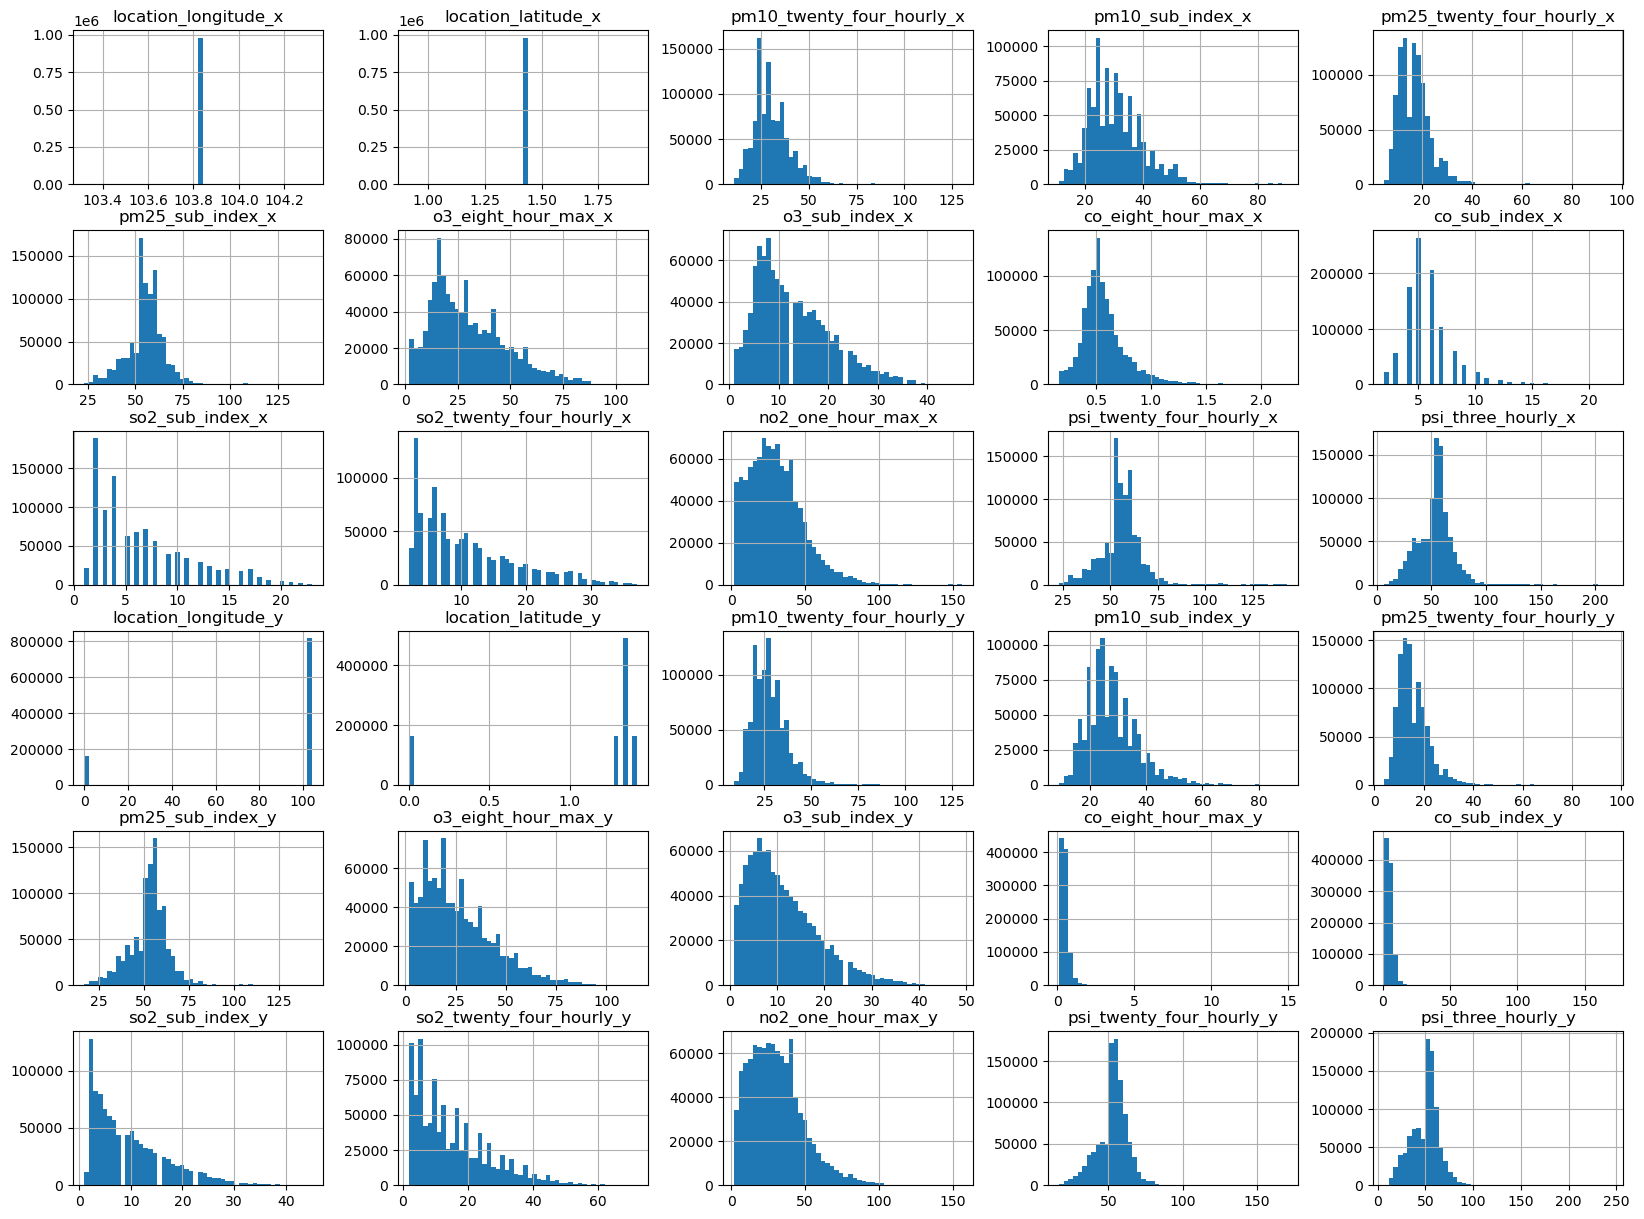

In [ ]:
import matplotlib.pyplot as plt

merged_df.hist(bins=50, figsize=(20, 15))
plt.show()

In [ ]:
# Step 1: Check if 'date' exists in both DataFrames
print(psi2016north.columns)
print(dailyweather_clean_numeric_2016.columns)

# Step 2: Check types of 'date'
print(psi2016north['date'].dtype)
print(dailyweather_clean_numeric_2016['date'].dtype)

# Step 3: If types are not the same, convert them
psi2016north['date'] = pd.to_datetime(psi2016north['date'])
dailyweather_clean_numeric_2016['date'] = pd.to_datetime(dailyweather_clean_numeric_2016['date'])

# Step 4: Now merge
merged_df = pd.merge(psi2016north, dailyweather_clean_numeric_2016, on='date', how='inner')

Index(['date', 'timestamp', 'update_timestamp', 'region', 'region_id',
       'location_longitude', 'location_latitude', 'pm10_twenty_four_hourly',
       'pm10_sub_index', 'pm25_twenty_four_hourly', 'pm25_sub_index',
       'o3_eight_hour_max', 'o3_sub_index', 'co_eight_hour_max',
       'co_sub_index', 'so2_sub_index', 'so2_twenty_four_hourly',
       'no2_one_hour_max', 'psi_twenty_four_hourly', 'psi_three_hourly'],
      dtype='object')
Index(['date', 'station', 'daily_rainfall_total', 'highest_30_min_rainfall',
       'highest_60_min_rainfall', 'highest_120_min_rainfall',
       'mean_temperature', 'maximum_temperature', 'minimum_temperature',
       'mean_wind_speed', 'max_wind_speed'],
      dtype='object')
object
datetime64[ns]


/var/folders/w2/svppx15n0q1f6269nrsbflrr0000gn/T/ipykernel_2276/1893186124.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  psi2016north['date'] = pd.to_datetime(psi2016north['date'])
/var/folders/w2/svppx15n0q1f6269nrsbflrr0000gn/T/ipykernel_2276/1893186124.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dailyweather_clean_numeric_2016['date'] = pd.to_datetime(dailyweather_clean_numeric_2016['date'])


In [ ]:
merged_df.describe()

,date,location_longitude,location_latitude,pm10_twenty_four_hourly,pm10_sub_index,pm25_twenty_four_hourly,pm25_sub_index,o3_eight_hour_max,o3_sub_index,co_eight_hour_max,...,psi_three_hourly,daily_rainfall_total,highest_30_min_rainfall,highest_60_min_rainfall,highest_120_min_rainfall,mean_temperature,maximum_temperature,minimum_temperature,mean_wind_speed,max_wind_speed
count,3586,3.586000e+03,3.586000e+03,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,...,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000
mean,2016-06-29 03:25:11.879531264,1.038200e+02,1.418030e+00,29.172616,29.093977,15.696319,52.600390,32.642499,13.837423,0.582211,...,50.775237,5.289571,3.249024,4.070719,4.635081,27.985806,32.189598,25.351478,9.061378,35.482711
min,2016-02-07 00:00:00,1.038200e+02,1.418030e+00,12.000000,12.000000,5.000000,23.000000,2.000000,1.000000,0.180000,...,8.000000,0.000000,0.000000,0.000000,0.000000,24.700000,26.500000,22.100000,5.000000,21.200000
25%,2016-03-22 00:00:00,1.038200e+02,1.418030e+00,23.000000,23.000000,11.000000,46.000000,18.000000,8.000000,0.450000,...,41.000000,0.000000,0.000000,0.000000,0.000000,27.200000,31.100000,24.600000,6.500000,30.600000
50%,2016-05-07 00:00:00,1.038200e+02,1.418030e+00,28.000000,28.000000,15.000000,54.000000,30.000000,13.000000,0.540000,...,53.000000,0.600000,0.400000,0.400000,0.400000,28.100000,32.300000,25.400000,8.600000,34.200000
75%,2016-11-18 00:00:00,1.038200e+02,1.418030e+00,34.000000,34.000000,19.000000,59.000000,44.000000,19.000000,0.640000,...,60.000000,5.200000,3.400000,4.550000,4.600000,28.700000,33.700000,26.100000,10.800000,40.300000
max,2016-12-31 00:00:00,1.038200e+02,1.418030e+00,70.000000,60.000000,41.000000,84.000000,110.000000,47.000000,2.230000,...,136.000000,69.000000,29.400000,47.000000,49.800000,30.300000,36.300000,27.900000,18.000000,58.000000
std,NaN,5.713560e-12,9.682495e-14,9.302781,9.067257,5.948742,10.156713,18.487069,7.838008,0.228541,...,14.582874,10.432333,5.722133,7.361777,8.525218,1.100132,1.892760,1.048433,3.024113,7.425993


In [ ]:


merged_df_nodate= merged_df.drop(columns=['date', 'timestamp', 'region','region_id', 'station','update_timestamp'], errors='ignore')

In [ ]:
merged_df_nodate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pm10_twenty_four_hourly   3586 non-null   float64
 1   pm10_sub_index            3586 non-null   float64
 2   pm25_twenty_four_hourly   3586 non-null   float64
 3   pm25_sub_index            3586 non-null   float64
 4   o3_eight_hour_max         3586 non-null   float64
 5   o3_sub_index              3586 non-null   float64
 6   co_eight_hour_max         3586 non-null   float64
 7   co_sub_index              3586 non-null   float64
 8   so2_sub_index             3586 non-null   float64
 9   so2_twenty_four_hourly    3586 non-null   float64
 10  no2_one_hour_max          3586 non-null   float64
 11  psi_twenty_four_hourly    3586 non-null   float64
 12  psi_three_hourly          3586 non-null   float64
 13  daily_rainfall_total      3586 non-null   float64
 14  highest_

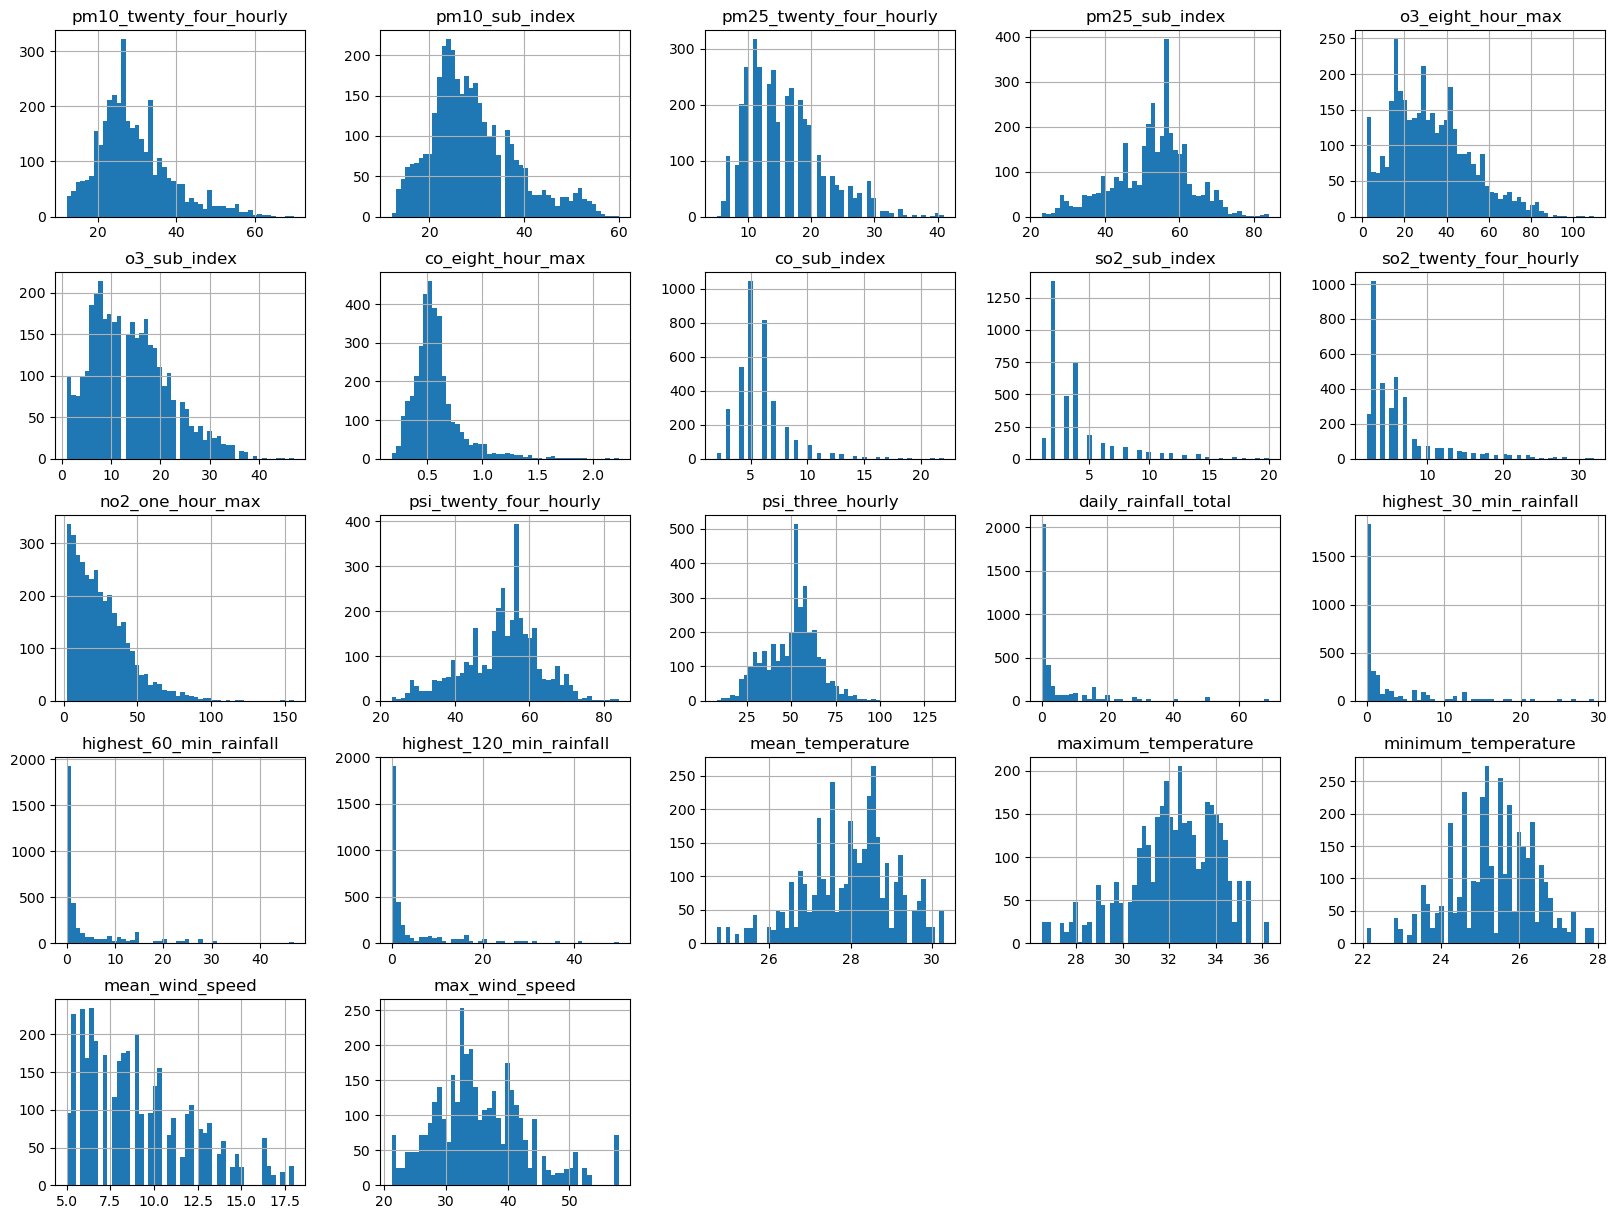

In [ ]:
merged_df_nodate.hist(bins=50, figsize=(20, 15))
plt.show()

In [ ]:
correlation_matrix = merged_df_nodate.corr()
print(correlation_matrix)

                          pm10_twenty_four_hourly  pm10_sub_index  \
pm10_twenty_four_hourly                  1.000000        0.998537   
pm10_sub_index                           0.998537        1.000000   
pm25_twenty_four_hourly                  0.941917        0.942074   
pm25_sub_index                           0.895747        0.900781   
o3_eight_hour_max                        0.238942        0.240673   
o3_sub_index                             0.238919        0.240643   
co_eight_hour_max                        0.376058        0.377839   
co_sub_index                             0.378114        0.379899   
so2_sub_index                            0.194423        0.197016   
so2_twenty_four_hourly                   0.192883        0.195399   
no2_one_hour_max                         0.280711        0.287659   
psi_twenty_four_hourly                   0.895847        0.900857   
psi_three_hourly                         0.633981        0.634713   
daily_rainfall_total              

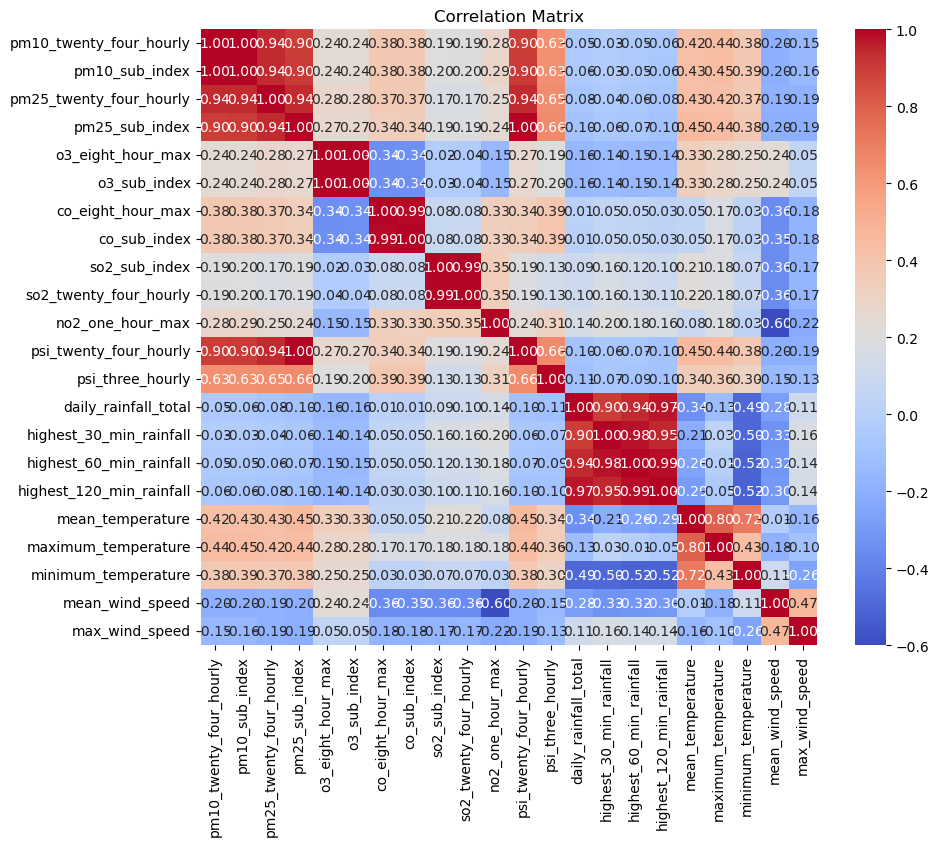

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

temperature correlate with pm10, pm25 o3, co, wind speed negatively correlate with  pm10, pm25 o3, co